In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from langdetect import detect
import re

In [2]:
# Directory containing text files
dir_path = "/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum"

# Read all text files
file_paths = glob.glob(os.path.join(dir_path, "*.txt"))
file_paths.sort()

documents = [open(file, "r", encoding="utf-8").read() for file in file_paths]
file_names = [os.path.basename(file) for file in file_paths]


# documents.sort()
# file_names.sort()
# Compute TF-IDF and Cosine Similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
similarity_matrix = cosine_similarity(tfidf_matrix)


In [3]:
print(file_paths)
# print(documents)
print(file_names)

['/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_1.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_10.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_11.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_12.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_13.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_14.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_15.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_16.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_17.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_18.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_19.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_2.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_20.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_21.txt', '/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum/run_22.txt', '/home/aansh/nnsightusage/

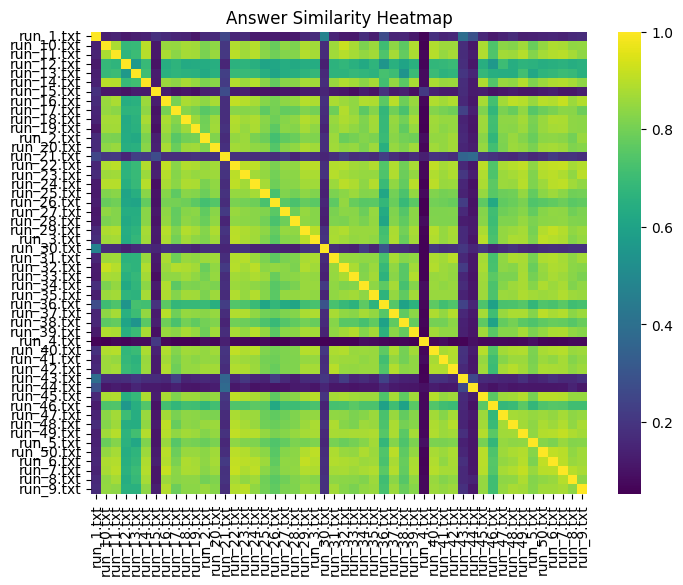

In [4]:
# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=False, xticklabels=file_names, yticklabels=file_names, cmap="viridis")
plt.title("Answer Similarity Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

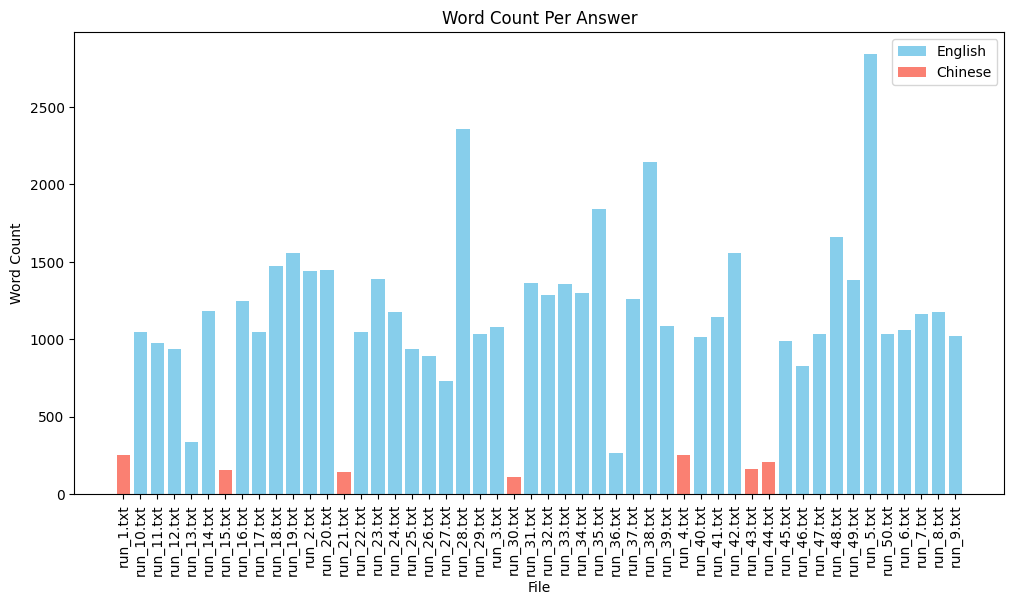

In [20]:
# Compute additional metrics
word_counts = [len(doc.split()) for doc in documents]
unique_word_counts = [len(set(doc.split())) for doc in documents]

chinese_files.sort()

# Plot Word Count Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(file_names, word_counts, color="skyblue", label="English")
plt.bar(chinese_files, ch_word_counts, color="salmon", label="Chinese")
plt.xlabel("File")
plt.ylabel("Word Count")
plt.title("Word Count Per Answer")
plt.xticks(rotation=90)
plt.legend()
plt.show()

# # Plot Unique Words Count
# plt.figure(figsize=(12, 6))
# plt.bar(file_names, unique_word_counts, color="salmon")
# plt.xlabel("File")
# plt.ylabel("Unique Words")
# plt.title("Unique Word Count Per Answer")
# plt.xticks(rotation=90)
# plt.show()

In [6]:
# Directory containing text files
dir_path = "/home/aansh/nnsightusage/Logs/OddNaturalNumbersSum"

# Read all text files
file_paths = glob.glob(os.path.join(dir_path, "*.txt"))

# Initialize lists
english_answers = []
chinese_answers = []
english_files = []
chinese_files = []

len(file_paths)

50

In [7]:
def is_chinese(text, threshold=5):
    return len(re.findall(r'[\u4e00-\u9fff]', text)) >= threshold  # Count Chinese characters

# Read all text files
file_paths = glob.glob(os.path.join(dir_path, "*.txt"))

# Initialize lists
english_answers = []
chinese_answers = []
english_files = []
chinese_files = []

# Categorize based on Chinese character presence
for file in file_paths:
    with open(file, "r", encoding="utf-8") as f:
        text = f.read().strip()
        if is_chinese(text):  # Check if at least 5 Chinese characters exist
            chinese_answers.append(text)
            chinese_files.append(os.path.basename(file))
        else:
            english_answers.append(text)
            english_files.append(os.path.basename(file))

# Output the number of files in each category
print(f"English Answers: {len(english_answers)} files")
print(f"Chinese Answers: {len(chinese_answers)} files")

English Answers: 43 files
Chinese Answers: 7 files


In [8]:
chinese_files_index = []
for ch_file in chinese_files:
    chinese_files_index.append(file_names.index(ch_file))
    
english_files_index = []
for en_file in english_files:
    english_files_index.append(file_names.index(en_file))
    
chinese_files_index.sort()
english_files_index.sort()

print(f"engilsh_files_index: {english_files_index}")
print(f"chinese_files_index: {chinese_files_index}")

engilsh_files_index: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
chinese_files_index: [0, 6, 13, 23, 33, 37, 38]


In [9]:
ch_word_counts = [word_counts[ch_index] for ch_index in chinese_files_index]
en_word_counts = [word_counts[en_index] for en_index in english_files_index]

print(f"ch_word_counts_mean: {np.mean(ch_word_counts)}")
print(f"en_word_counts_mean: {np.mean(en_word_counts)}")

ch_word_counts_mean: 184.42857142857142
en_word_counts_mean: 1235.3720930232557


In [11]:
chinese_files

['run_21.txt',
 'run_44.txt',
 'run_4.txt',
 'run_1.txt',
 'run_43.txt',
 'run_15.txt',
 'run_30.txt']

In [14]:
chinese_files_index

[0, 6, 13, 23, 33, 37, 38]

In [18]:
word_counts[13]

145

In [16]:
ch_word_counts

[255, 158, 145, 113, 252, 161, 207]